# EXPLORATORY DATA ANALYSIS

IMPORTING THE LIBRARIES

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
#Loading the train and test dataset
train=pd.read_csv('train_agriculture.csv')
test=pd.read_csv('test_agriculture.csv')

In [19]:
train.shape

(4599, 10)

In [20]:
test.shape

(1199, 9)

In [21]:
#adding an extra column source and joining train and test datas and assigning name d1
train["source"]="train"
test["source"]="test"
d1=pd.concat([train,test],ignore_index=True)
d1.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,F00000001,188,1,0,1,0,0.0,0,1,0.0,train
1,F00000003,209,1,0,1,0,0.0,0,2,1.0,train
2,F00000004,257,1,0,1,0,0.0,0,2,1.0,train
3,F00000005,257,1,1,1,0,0.0,0,2,1.0,train
4,F00000006,342,1,0,1,0,0.0,0,2,1.0,train


In [22]:
d1.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
5793,F00003133,1132,0,1,2,40,34.0,7,3,NaN,test
5794,F00003135,1132,0,1,2,40,25.0,3,1,NaN,test
5795,F00003138,1132,0,1,2,20,13.0,23,1,NaN,test
5796,F00003149,1212,0,1,2,10,35.0,5,1,NaN,test
5797,F00003150,1212,0,1,2,15,NaN,20,3,NaN,test


In [23]:
d1.shape

(5798, 11)

#There are 5798 rows and 11 columns

In [24]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5798 entries, 0 to 5797
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5798 non-null   object 
 1   Estimated_Insects_Count  5798 non-null   int64  
 2   Crop_Type                5798 non-null   int64  
 3   Soil_Type                5798 non-null   int64  
 4   Pesticide_Use_Category   5798 non-null   int64  
 5   Number_Doses_Week        5798 non-null   int64  
 6   Number_Weeks_Used        5237 non-null   float64
 7   Number_Weeks_Quit        5798 non-null   int64  
 8   Season                   5798 non-null   int64  
 9   Crop_Damage              4599 non-null   float64
 10  source                   5798 non-null   object 
dtypes: float64(2), int64(7), object(2)
memory usage: 498.4+ KB


There are no null values in our dataset

In [25]:
#checking the unique values in the output column crop damage
d1['Crop_Damage'].value_counts()

0.0    3820
1.0     664
2.0     115
Name: Crop_Damage, dtype: int64

In [26]:
#dropping id column as it provides no information for our analysis
d1.drop('ID',axis=1,inplace=True)

In [27]:
#implying label encoder on class column to convert into integer
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d1['source']=le.fit_transform(d1['source'])

In [28]:
#checking number of unique values in each row
d1.nunique()

Estimated_Insects_Count    71
Crop_Type                   2
Soil_Type                   2
Pesticide_Use_Category      3
Number_Doses_Week          20
Number_Weeks_Used          63
Number_Weeks_Quit          47
Season                      3
Crop_Damage                 3
source                      2
dtype: int64

In [29]:
#Checking the maximum and minimum unique values
for column in d1.columns:
    print(f"=======Column: {column}=======")
    print(f"Number of unique values: {d1[column].nunique()}")
    print(f"Max: {d1[column].max()}")
    print(f"Min: {d1[column].min()}")

=======Column: Estimated_Insects_Count=======
Number of unique values: 71
Max: 4097
Min: 150
=======Column: Crop_Type=======
Number of unique values: 2
Max: 1
Min: 0
=======Column: Soil_Type=======
Number of unique values: 2
Max: 1
Min: 0
=======Column: Pesticide_Use_Category=======
Number of unique values: 3
Max: 3
Min: 1
=======Column: Number_Doses_Week=======
Number of unique values: 20
Max: 95
Min: 0
=======Column: Number_Weeks_Used=======
Number of unique values: 63
Max: 66.0
Min: 0.0
=======Column: Number_Weeks_Quit=======
Number of unique values: 47
Max: 47
Min: 0
=======Column: Season=======
Number of unique values: 3
Max: 3
Min: 1
=======Column: Crop_Damage=======
Number of unique values: 3
Max: 2.0
Min: 0.0
=======Column: source=======
Number of unique values: 2
Max: 1
Min: 0


In [30]:
d1.isnull().values.any()

True

In [31]:
d1.isnull().sum()

Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
source                        0
dtype: int64

#There are null values in number weeks used column.crop damage column is the column we want to predict

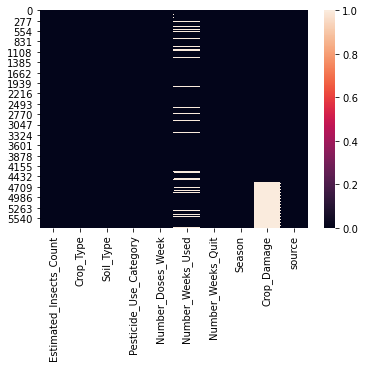

In [32]:
sns.heatmap(d1.isnull())

In [33]:
#filling na values with mean of that column
d1["Number_Weeks_Used"]=d1["Number_Weeks_Used"].fillna(d1["Number_Weeks_Used"].median())
d1["Crop_Damage"]=d1["Crop_Damage"].fillna(d1["Crop_Damage"].median())

In [34]:
d1.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000
mean,1347.643153,0.218524,0.472232,2.304243,26.493618,28.831321,8.760262,1.891687,0.154191,0.793205
std,821.330403,0.413280,0.499271,0.484594,15.655508,12.002221,9.582781,0.692997,0.412449,0.405042
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000,1.000000
50%,1132.000000,0.000000,0.000000,2.000000,20.000000,28.000000,6.000000,2.000000,0.000000,1.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,15.000000,2.000000,0.000000,1.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000,1.000000


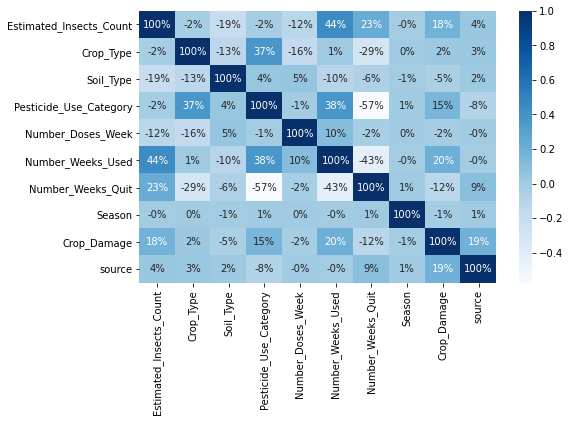

In [35]:
d1cor=d1.corr()
plt.figure(figsize=(8,5))
sns.heatmap(d1cor,cmap='Blues',annot=True,fmt='.0%')
plt.show()

This correlation heatmap can be expressed in matrix form also.It is displayed in descending order.columns with least correlation with target column are displayed at last.

In [36]:
corr_matrix=d1.corr()
print(corr_matrix["Crop_Damage"].sort_values(ascending=False))

Crop_Damage                1.000000
Number_Weeks_Used          0.200955
source                     0.190899
Estimated_Insects_Count    0.182373
Pesticide_Use_Category     0.153633
Crop_Type                  0.024936
Season                    -0.012775
Number_Doses_Week         -0.016304
Soil_Type                 -0.048734
Number_Weeks_Quit         -0.118133
Name: Crop_Damage, dtype: float64


In [37]:
d1.dtypes

Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                float64
source                       int32
dtype: object

In [38]:
collist=d1.columns.values
ncol=25
nrows=7

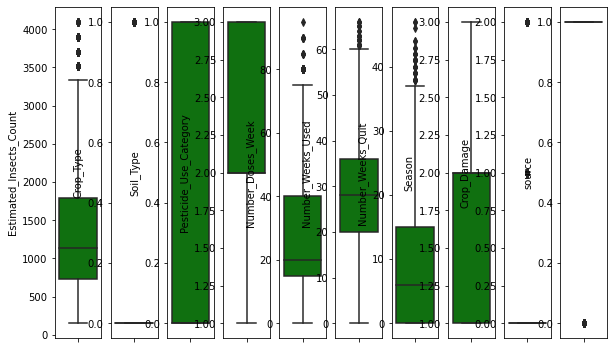

In [39]:
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d1[collist[i]],color='green',orient='v')

# UNIVARIATE ANALYSIS

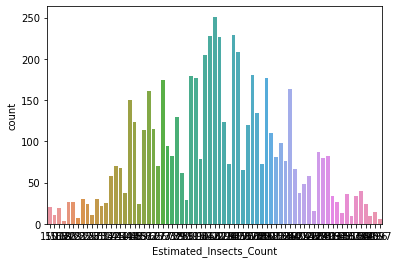

In [40]:
sns.countplot(d1["Estimated_Insects_Count"])

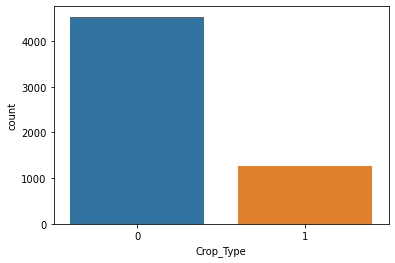

In [41]:
sns.countplot(d1["Crop_Type"])

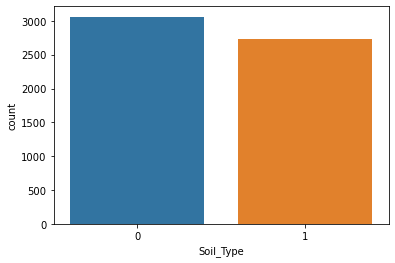

In [42]:
sns.countplot(d1["Soil_Type"])

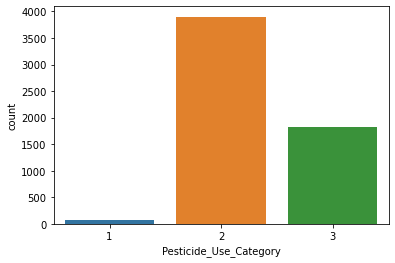

In [43]:
sns.countplot(d1["Pesticide_Use_Category"])

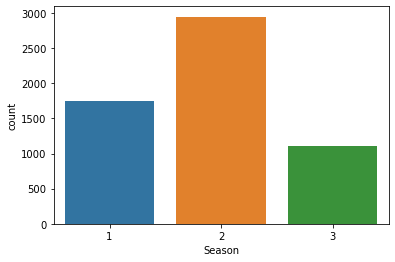

In [44]:
sns.countplot(d1["Season"])

#analysis is done in 3 seasons.Most of the crops are in second season

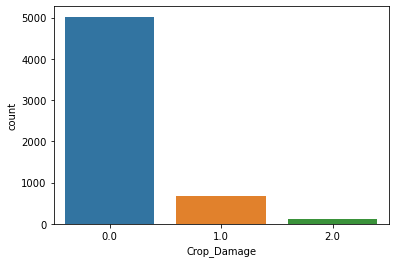

In [45]:
sns.countplot(d1["Crop_Damage"])

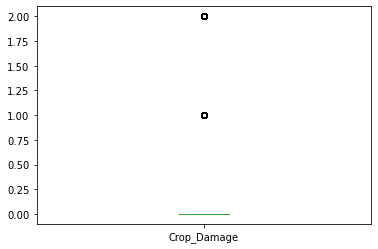

In [46]:
d1["Crop_Damage"].plot.box()

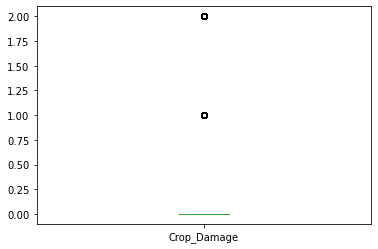

In [47]:
d1["Crop_Damage"].plot.box()

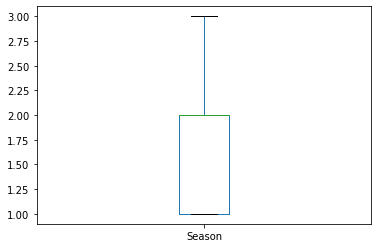

In [48]:
d1["Season"].plot.box()

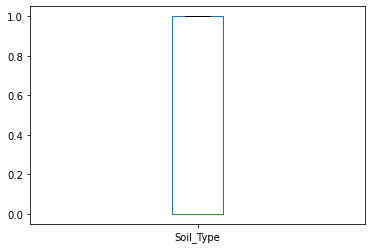

In [49]:
d1["Soil_Type"].plot.box()

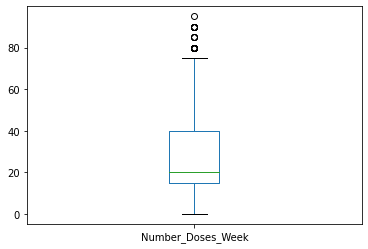

In [50]:
d1["Number_Doses_Week"].plot.box()

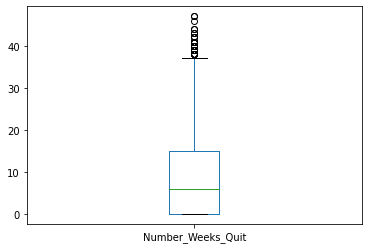

In [51]:
d1["Number_Weeks_Quit"].plot.box()

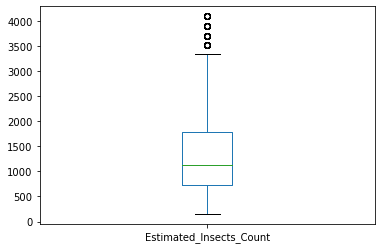

In [52]:
d1["Estimated_Insects_Count"].plot.box()

#The black dots outside the boxplot shows outliers

# BIVARIATE ANALYSIS

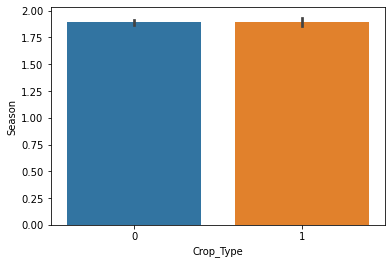

In [53]:
sns.barplot(x=d1['Crop_Type'],y=d1['Season'])

#we can see both the crop types are suitable for the three seasons

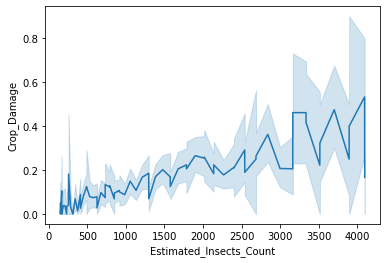

In [54]:
sns.lineplot(x="Estimated_Insects_Count",y="Crop_Damage",data=d1)
plt.show()

There is a rise in crop damage as the estimated insects counts increases

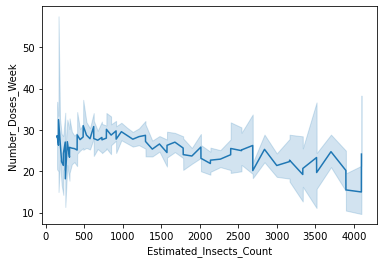

In [55]:
sns.lineplot(x="Estimated_Insects_Count",y="Number_Doses_Week",data=d1)
plt.show()

#number of doses used per week is almost same ,that is between 15 and 30 range,but we can see estimated insect count has a rise from 0 to 4000

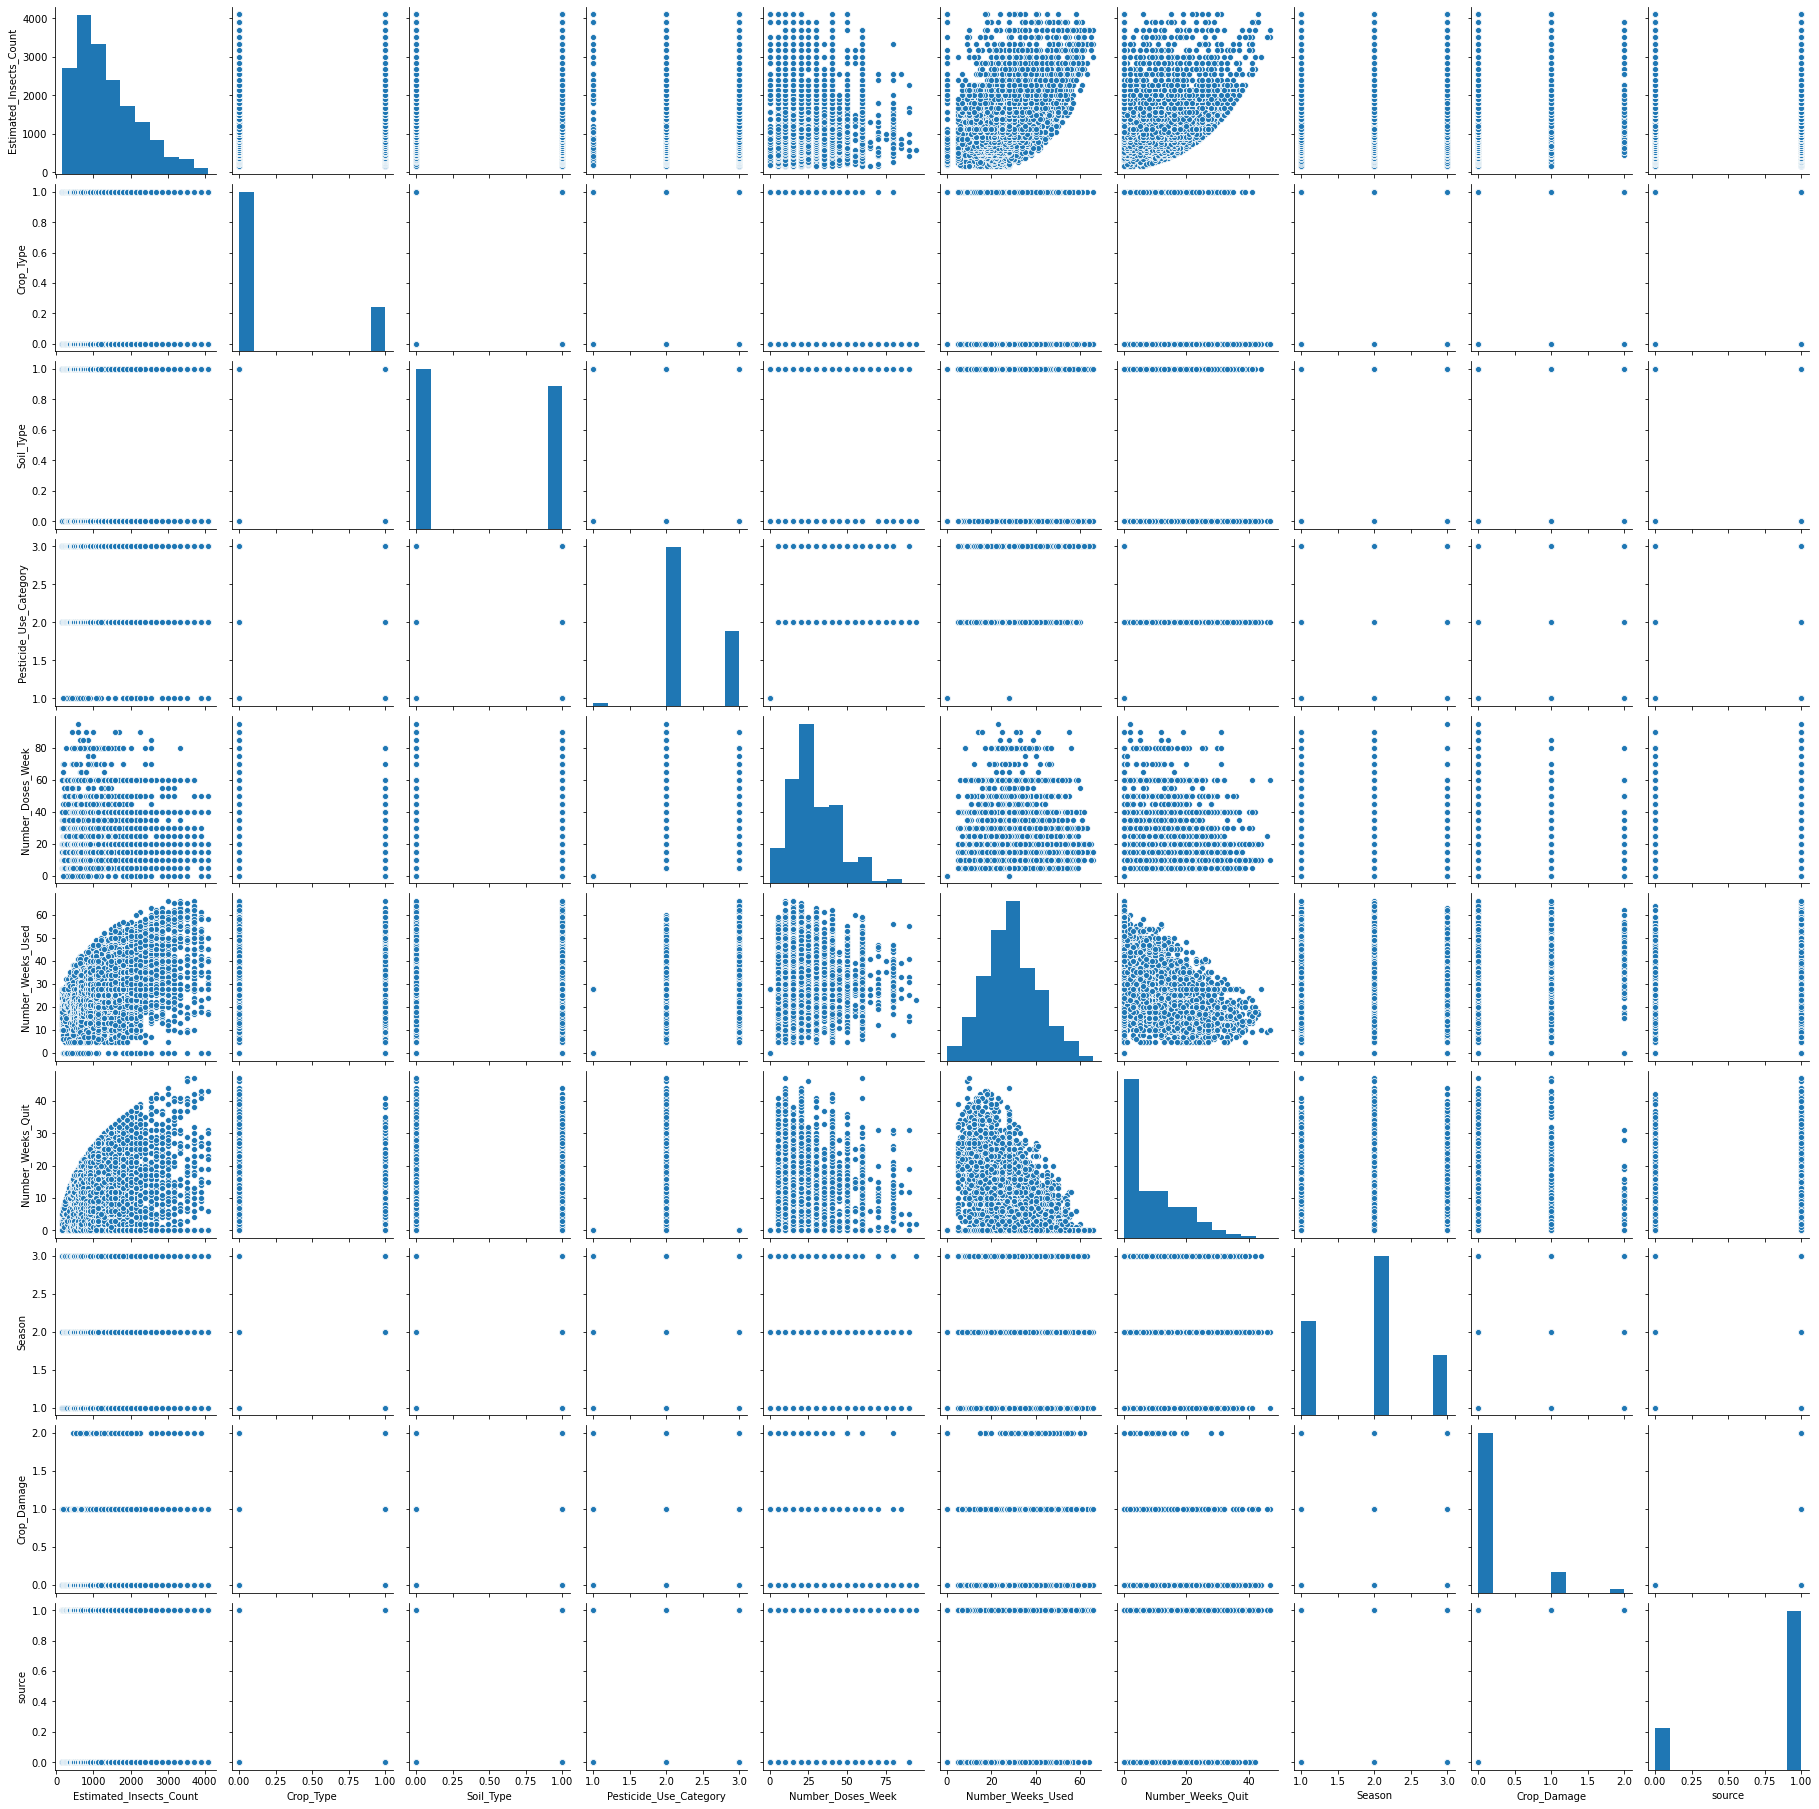

In [56]:
sns.pairplot(d1)

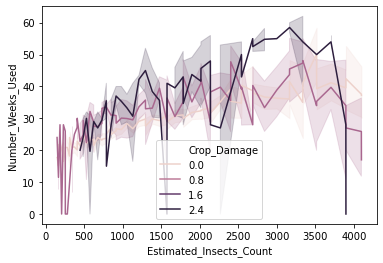

In [57]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='Estimated_Insects_Count', y='Number_Weeks_Used',hue='Crop_Damage',data=d1)

#after a certain rise in number of weeks used,estimated insects count has declined

In [58]:
d1.isnull().values.any()

False

In [59]:
#dropping the output column to check any other columns have null values
df=d1.drop("Crop_Damage",axis=1)
df.shape

(5798, 9)

In [60]:
df.isnull().values.any()

False

In [61]:
df.skew()

Estimated_Insects_Count    0.948378
Crop_Type                  1.362628
Soil_Type                  0.111273
Pesticide_Use_Category     0.543183
Number_Doses_Week          0.929452
Number_Weeks_Used          0.288353
Number_Weeks_Quit          0.972163
Season                     0.147252
source                    -1.448272
dtype: float64

In [62]:
#skewness can be removed using yeo_johnson method
from sklearn.preprocessing import power_transform
df=pd.DataFrame(power_transform(df,method='yeo-johnson'),columns=df.columns)
df.skew()

Estimated_Insects_Count   -0.029681
Crop_Type                  1.362628
Soil_Type                  0.111273
Pesticide_Use_Category    -0.017619
Number_Doses_Week          0.006384
Number_Weeks_Used         -0.005329
Number_Weeks_Quit         -0.056353
Season                    -0.041936
source                    -1.448272
dtype: float64

In [65]:
from scipy.stats import zscore
columns=['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season']
for i in range(len(columns)):
    df[columns[i]]=zscore(df[columns[i]])
    for j in range(len(df[columns[i]])):
        if df[columns[i]][j]>3 or df[columns[i]][j]<-3:
            df[columns[i]].replace(df[columns[i]][j],df[columns[i]].median(),inplace=True)
            df[columns[i]]=np.cbrt((df[columns[i]]))

In [66]:
d1=d1.astype(int)

In [67]:
x=df[columns]
y=d1[["Crop_Damage"]]

In [68]:
print(x.shape)
print(y.shape)

(5798, 8)
(5798, 1)


In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-2.24521854,  1.89107487, -0.94592349, ..., -2.86582591,
        -1.19493109, -1.33570951],
       [-2.14299003,  1.89107487, -0.94592349, ..., -2.86582591,
        -1.19493109,  0.21672631],
       [-1.93478897,  1.89107487, -0.94592349, ..., -2.86582591,
        -1.19493109,  0.21672631],
       ...,
       [-0.04986471, -0.52879979,  1.05716796, ..., -1.35150706,
         1.24639174, -1.33570951],
       [ 0.05625277, -0.52879979,  1.05716796, ...,  0.54304393,
         0.10423983, -1.33570951],
       [ 0.05625277, -0.52879979,  1.05716796, ..., -0.02126298,
         1.13073842,  1.51588024]])

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtc=  DecisionTreeClassifier()

max_score=0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
   
    dtc.fit(x_train,y_train)
    y_pred=dtc.predict(x_test)
    acc_scr=accuracy_score(y_test,y_pred)
    if acc_scr>max_score:
        max_score=acc_scr
        final_r_state=r_state
print("max accuracy score corresponding to",final_r_state,"is",max_score)

max accuracy score corresponding to 71 is 0.79858934169279


In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=71)

In [86]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4522, 8)
(1276, 8)
(4522, 1)
(1276, 1)


In [88]:
model=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print("Accuracy score :",accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('******************************************************************************')
    print('\n')

score of DecisionTreeClassifier() is: 0.9975674480318443
Error:
Accuracy score : 0.7891849529780565
[[975 123  16]
 [ 95  29   7]
 [ 22   6   3]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1114
           1       0.18      0.22      0.20       131
           2       0.12      0.10      0.11        31

    accuracy                           0.79      1276
   macro avg       0.40      0.40      0.40      1276
weighted avg       0.80      0.79      0.79      1276

******************************************************************************


score of KNeighborsClassifier() is: 0.8757187085360459
Error:
Accuracy score : 0.8526645768025078
[[1074   40    0]
 [ 117   14    0]
 [  29    2    0]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1114
           1       0.25      0.11      0.15       131
           2       0.00      0.00      0.00        31

    accuracy         

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000,random_state=51)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score : 0.859717868338558
[[1085   26    3]
 [ 117   12    2]
 [  29    2    0]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      1114
           1       0.30      0.09      0.14       131
           2       0.00      0.00      0.00        31

    accuracy                           0.86      1276
   macro avg       0.39      0.36      0.36      1276
weighted avg       0.80      0.86      0.82      1276



In [90]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy score : 0.8753918495297806
[[1112    2    0]
 [ 126    5    0]
 [  31    0    0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1114
           1       0.71      0.04      0.07       131
           2       0.00      0.00      0.00        31

    accuracy                           0.88      1276
   macro avg       0.53      0.35      0.34      1276
weighted avg       0.84      0.88      0.82      1276



In [92]:
#adaboost classifier is giving the best accuracy score.so checking its cross val score
from sklearn.model_selection import cross_val_score
adscores=cross_val_score(ad,x,y,cv=5)
print(adscores)
print(adscores.mean(),adscores.std())

[0.86293103 0.86551724 0.84568966 0.84900777 0.85591027]
0.8558111927642734 0.007663439043841847


In [93]:
import joblib
joblib.dump(ad,'ad_agriculture.pkl')

['ad_agriculture.pkl']